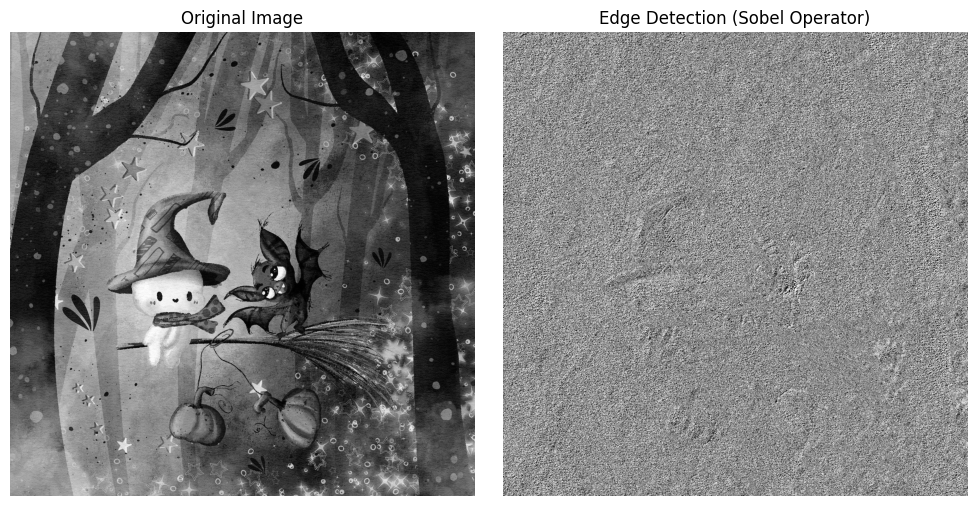

Edge-detected image saved as sobel_edge_detected.jpg


In [1]:
# sobel_edge_detection.py

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def sobel_operator(img):
    # Define Sobel kernels for horizontal and vertical edge detection
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

    kernel_y = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]])

    # Apply convolution using Sobel kernels
    grad_x = convolve(img, kernel_x)
    grad_y = convolve(img, kernel_y)

    # Compute the gradient magnitude
    grad_magnitude = np.hypot(grad_x, grad_y)
    grad_magnitude = grad_magnitude / grad_magnitude.max() * 255

    return grad_magnitude

def edge_detection_sobel(input_path, output_path):
    img = Image.open(input_path).convert("L")  # Convert image to grayscale
    img_array = np.array(img)

    # Apply Sobel edge detection
    edge_img_array = sobel_operator(img_array)

    # Convert the edge-detected image back to an image
    edge_img = Image.fromarray(edge_img_array.astype(np.uint8))

    # Save the output image
    edge_img.save(output_path)

    # Display original and edge-detected images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(edge_img, cmap="gray")
    plt.title("Edge Detection (Sobel Operator)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"          
    output_path = "sobel_edge_detected.jpg"  
    edge_detection_sobel(input_path, output_path)
    print(f"Edge-detected image saved as {output_path}")
